## IMDB Movies Dataset

IMDB Movies Dataset
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
Dataset provided by Kaggle

## Interesting questions to ask:

#### 1. What is the most popular movie genre? (Average IMDb Rating for Each Genre)

#### 2. Box Office Sales by Year

#### 3. Correlation Between Movie's Runtime and IMDb Rating

#### 4. Top 25 Grossing Genres

#### 5. Top 25 Grossing Movies of all time





---------------------------------------------------------------------------------------------------------------------------



## Data Analysis Project Process Steps:

-- Open .csv file in Google Sheets to have a quick look (do screen recordings)

-- Clean data, correct file names, remove extra characters and null values, save as .csv

-- Post a poll about the dataset and ask people for questions to be answered in data

-- Make a list of interesting questions to ask (in a Jupyter notebook)

-- Post credit for original dataset

-- Open in Python, SQL, Jupiter Notebooks (The note book will be made public on Kaggle)

-- Open in Tableau, Looker, PowerBI

-- Create visualizations (Static or Dynamic)

-- Report any notable observations

---------------------------------------------------




In [29]:
import pandas as pd

In [30]:
import numpy as np

In [31]:
movies = pd.read_csv (r"C:\Users\remil\Desktop\Data Sets\Capstone Project - IMDB Moves Dataset\IMDB Movies Dataset\imdb_clean.csv")

### This will give us a quick peek at the first 5 rows of the table.

In [32]:
movies.head(3)

,Poster_Link,Title,Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Votes,Cast,Gross
0,https://m.media-amazon.com/images/M/MV5BNWMxYT...,300,2006,R,117,"Action, Drama",7.6,King Leonidas of Sparta and a force of 300 men...,52.0,Zack Snyder,Gerard Butler,Lena Headey,David Wenham,Dominic West,732876,"Gerard Butler, Lena Headey, David Wenham, Domi...","210,614,939.00"
1,https://m.media-amazon.com/images/M/MV5BOTdmNT...,1917,2019,R,119,"Drama, Thriller, War",8.3,"April 6th, 1917. As a regiment assembles to wa...",78.0,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,425844,"Dean-Charles Chapman, George MacKay, Daniel Ma...","159,227,644.00"
2,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,(500) Days of Summer,2009,UA,95,"Comedy, Drama, Romance",7.7,An offbeat romantic comedy about a woman who d...,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Zooey Deschanel, Joseph Gordon-Levitt, Geoffre...","32,391,374.00"


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Poster_Link  1000 non-null   object 
 1   Title        1000 non-null   object 
 2   Year         1000 non-null   int64  
 3   Certificate  899 non-null    object 
 4   Runtime      1000 non-null   int64  
 5   Genre        1000 non-null   object 
 6   IMDB_Rating  1000 non-null   float64
 7   Overview     1000 non-null   object 
 8   Meta_score   843 non-null    float64
 9   Director     1000 non-null   object 
 10  Star1        1000 non-null   object 
 11  Star2        1000 non-null   object 
 12  Star3        1000 non-null   object 
 13  Star4        1000 non-null   object 
 14  Votes        1000 non-null   int64  
 15  Cast         1000 non-null   object 
 16  Gross        831 non-null    object 
dtypes: float64(2), int64(3), object(12)
memory usage: 132.9+ KB


## Initial Observations



This dataset was downloaded from Kaggle, has a high rating and looks like a fun learning experience.

After downloading and exploring the dataset, I noticed a few oddities. The first was having 4 Star columns (Star1-Star4).
I presume the goal is to allow up to our Actors to be credited. It's also not entirely clear if Star1 is the top billed actor, followed by Star2, etc.  It does make it tricky to search with more granularity, and my quick solution was to combine all the columns into one column called 'Cast'.

Of the 1000 movies listed, 171 films were missing the gross amount earned. Most were older films or foreign made films where gross earnings were not available.


### Data Columns:

- Poster_Link - Link of the poster that imdb using - Not used
- Series_Title - Name of the movie
- Released_Year - Year at which that movie released
- Certificate - Certificate earned by that movie - missing 103 entries
- Runtime - Total runtime of the movie
- Genre - Genre of the movie
- IMDB_Rating - Rating of the movie at IMDB site
- Overview - mini story/ summary
- Meta_score - Score earned by the movie - 159 entries missing
- Director - Name of the Director
- Star1,Star2,Star3,Star4 - Name of the Stars
- No_of_votes - Total number of votes
- Gross - Money earned by that movie - 171 entries missing
- Confirmed all cells populated, documented missing cells above

### Data Cleaning Steps
- Collapsed unused columns (Poster Link, Movie Overview)
- Merged Star1-Star4 into Cast
- Removed ‘min’ from runtime, confirmed numerical
- Streamlined column title names
- Checked movie rating system, changed A (Adult) to R (Restricted) since they’re essentially the same



## 1. Average IMDb Rating for Each Genre

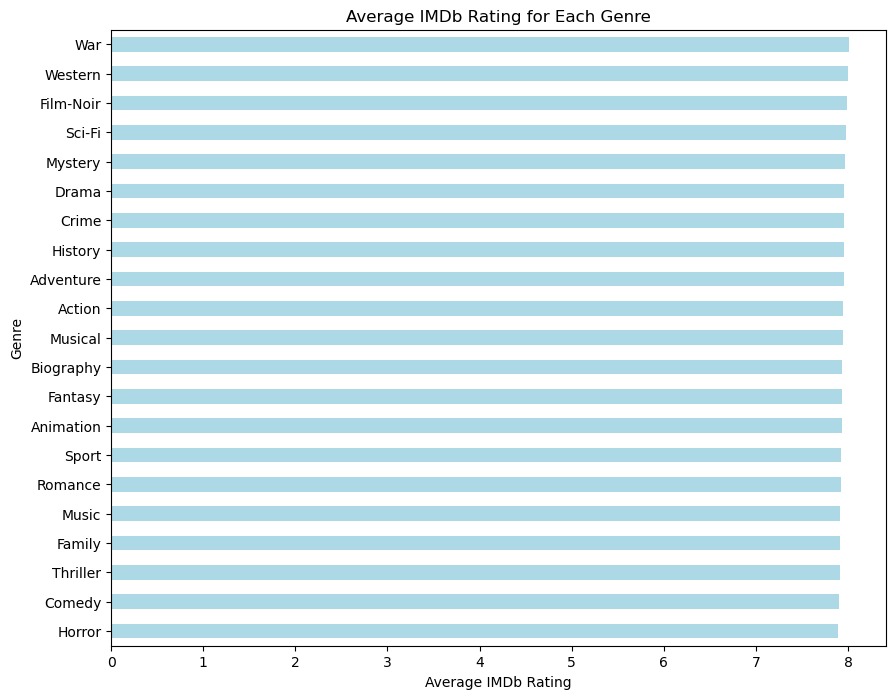

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r"C:\Users\remil\Desktop\Data Sets\Capstone Project - IMDB Moves Dataset\IMDB Movies Dataset\imdb_clean.csv")

# Split the 'Genre' column and explode it into a long format
data['Genre'] = data['Genre'].apply(lambda x: x.split(', '))
genre_data = data.explode('Genre')

# Calculate average IMDb rating per genre
genre_ratings = genre_data.groupby('Genre')['IMDB_Rating'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 8))
genre_ratings.plot(kind='barh', color='lightblue')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating for Each Genre')
plt.show()


### 2. Box Office Sales by Year


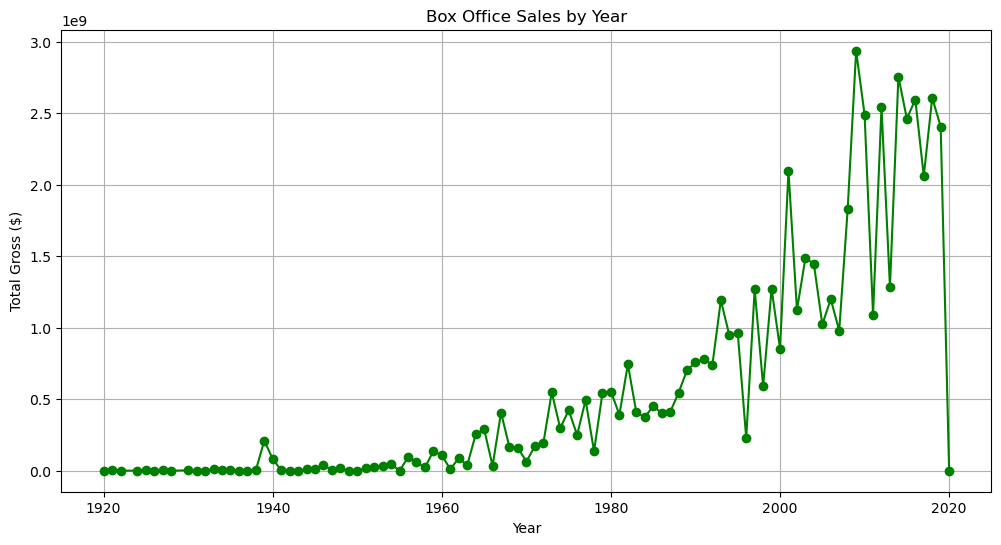

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r"C:\Users\remil\Desktop\Data Sets\Capstone Project - IMDB Moves Dataset\IMDB Movies Dataset\imdb_clean.csv")

# Convert 'Gross' from string to float, removing commas and other non-numeric characters
data['Gross'] = data['Gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Group by 'Year' and sum up the 'Gross' values
annual_gross = data.groupby('Year')['Gross'].sum()

# Plot
plt.figure(figsize=(12, 6))
annual_gross.plot(kind='line', marker='o', color='green')
plt.title('Box Office Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Gross ($)')
plt.grid(True)
plt.show()


### 3. Correlation Between Movie's Runtime and IMDb Rating

Data type of 'Runtime' before conversion: int64
Number of null values in 'Runtime': 0


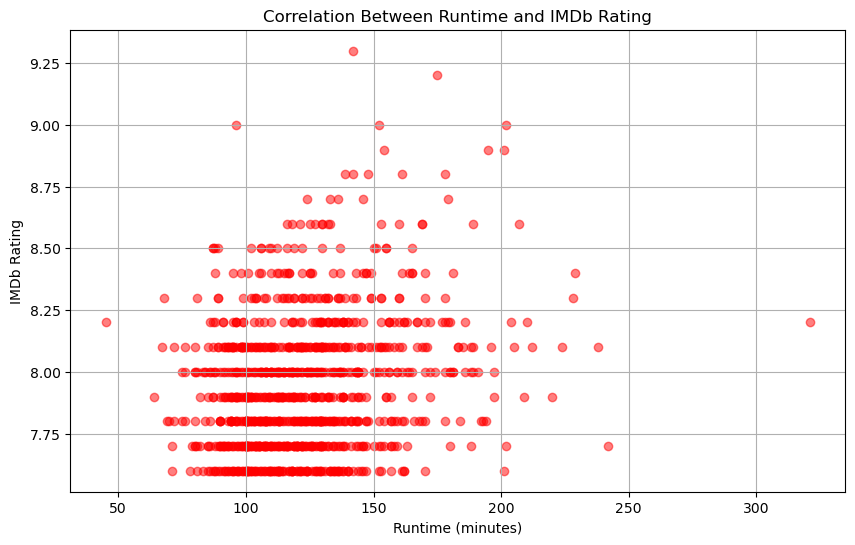

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r"C:\Users\remil\Desktop\Data Sets\Capstone Project - IMDB Moves Dataset\IMDB Movies Dataset\imdb_clean.csv")

# Check the datatype of the 'Runtime' column
print("Data type of 'Runtime' before conversion:", data['Runtime'].dtype)

# Check for null values
print("Number of null values in 'Runtime':", data['Runtime'].isnull().sum())

# If 'Runtime' is not a string type and contains no nulls, skip the string conversion
if data['Runtime'].dtype != 'O':  # 'O' stands for object, typically used for strings in pandas
    data['Runtime'] = data['Runtime'].astype(int)
else:
    # Assuming the data is in a format like '142 min' and contains no nulls
    data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(int)

# Scatter plot to show correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['Runtime'], data['IMDB_Rating'], alpha=0.5, color='red')
plt.title('Correlation Between Runtime and IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()


### 4. Top 25 Grossing Movie Genres

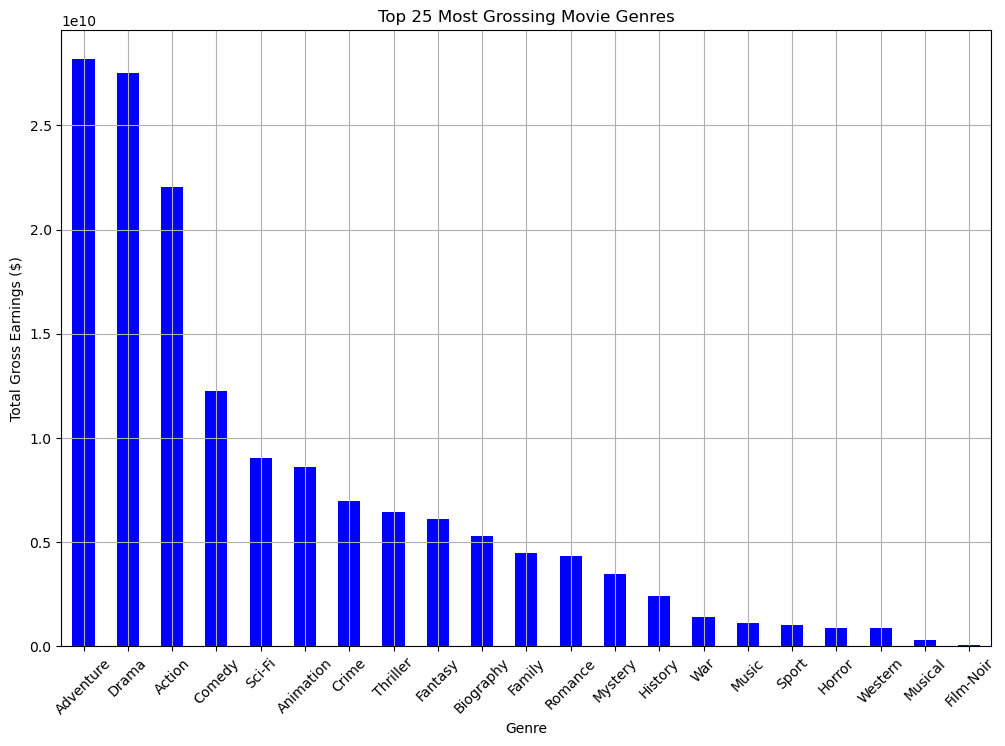

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r"C:\Users\remil\Desktop\Data Sets\Capstone Project - IMDB Moves Dataset\IMDB Movies Dataset\imdb_clean.csv")

# Split the 'Genre' column on each movie into separate rows
data['Genre'] = data['Genre'].str.split(', ')
genre_exploded = data.explode('Genre')

# Convert 'Gross' from string to float, if necessary, removing commas and other non-numeric characters
genre_exploded['Gross'] = genre_exploded['Gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Group by 'Genre' and sum up the 'Gross' values
genre_gross_sum = genre_exploded.groupby('Genre')['Gross'].sum().sort_values(ascending=False)

# Take the top 25 genres
top_25_genres = genre_gross_sum.head(25)

# Plotting
plt.figure(figsize=(12, 8))
top_25_genres.plot(kind='bar', color='blue')
plt.title('Top 25 Most Grossing Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Total Gross Earnings ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 5. Top 25 Grossing Movies of all time

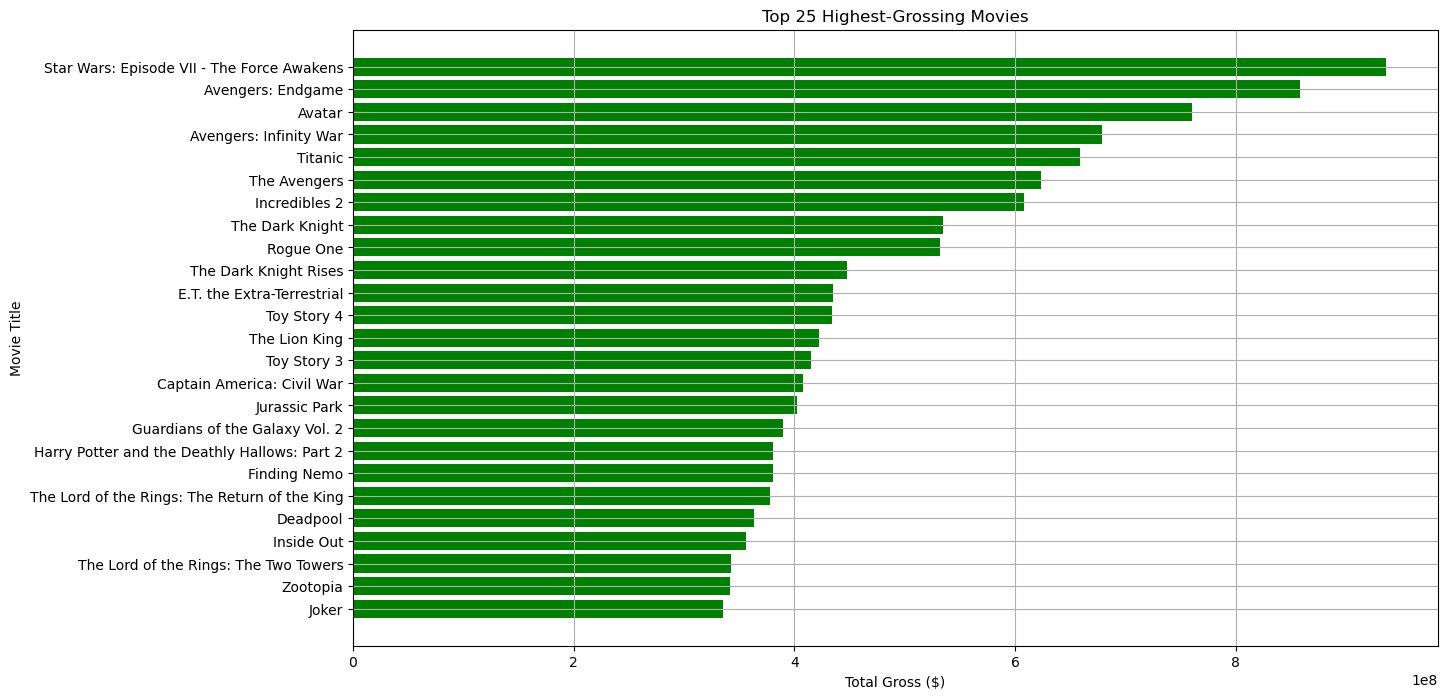

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r"C:\Users\remil\Desktop\Data Sets\Capstone Project - IMDB Moves Dataset\IMDB Movies Dataset\imdb_clean.csv")

# Convert 'Gross' from string to float, removing commas and other non-numeric characters
data['Gross'] = data['Gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Sort the data by 'Gross' in descending order to get the top-grossing movies
top_grossing_movies = data.sort_values(by='Gross', ascending=False).head(25)

# Plotting the top 25 highest-grossing movies
plt.figure(figsize=(14, 8))
plt.barh(top_grossing_movies['Title'], top_grossing_movies['Gross'], color='green')
plt.xlabel('Total Gross ($)')
plt.ylabel('Movie Title')
plt.title('Top 25 Highest-Grossing Movies')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest grossing at the top
plt.grid(True)
plt.show()
